## Capstone Project: Spatiotemporal Analysis of Annual Rainfall Patterns in Nepal (2016–2022)

## Objective

*   To explore and analyze annual rainfall data recorded at different stations in Nepal over the years 2016 to 2022.
*   To detect rainfall trends, regional variations, and potential correlations with elevation.

## Dataset Description
- **Source:** [National Statistics Office](https://data.nsonepal.gov.np/dataset/environmental-statistics/resource/9d953003-e045-4ee3-ad4b-bb2dac3336f0)
- **Columns:**
  - `Station`: Name of the measuring station
  - `District`: District where the station is located
  - `Elevation`: Elevation in meters
  - `2016` to `2022`: Annual rainfall values in millimeters


In [ ]:
#Install necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

# Or, Simply type: !pip install pandas numpy matplotlib seaborn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/underthegreen/capstone-project-on-data-analytics-BRICS/refs/heads/main/annual-rainfall-by-station-in-mm.csv')

# Show the total number of rows and columns
df.shape

(454, 10)

In [ ]:
#Load the top few data
df.head()

#We can also load the desired number of data.
#df.head(15) Here, 15 top data will load.

#If we want to load data from the last.
#df.head(-1)

,Station,District,Elevation,2016,2017,2018,2019,2020,2021,2022
0,Kakerpakha,Baitadi,783.0,1524.7,1339.4,1385.2,1308.0,NaN,1912.0,1454.6
1,Baitadi Gothalapani,Baitadi,1352.0,1185.6,NaN,1401.4,1534.1,NaN,NaN,NaN
2,Patan West,Baitadi,1292.0,1137.9,NaN,1255.5,1209.6,NaN,NaN,NaN
3,Dadeldhura,Dadeldhura,1879.0,1300.5,1374.1,1265.5,1101.3,1406.8,1889.9,1419.1
4,Mahendra Nagar,Kanchanpur,197.0,2013.0,1869.0,2494.3,1850.4,2457.2,NaN,2386.1


## Data Cleaning and Preprocessing
- Check for missing values
- Convert data from wide to long format for year-wise analysis
- Ensure correct data types

In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Station    454 non-null    object 
 1   District   417 non-null    object 
 2   Elevation  435 non-null    float64
 3   2016       378 non-null    float64
 4   2017       375 non-null    float64
 5   2018       387 non-null    float64
 6   2019       355 non-null    float64
 7   2020       241 non-null    float64
 8   2021       348 non-null    float64
 9   2022       370 non-null    float64
dtypes: float64(8), object(2)
memory usage: 35.6+ KB


In [ ]:
# Count total number of null data in each column
pd.isnull(df).sum()

,0
Station,0
District,37
Elevation,19
2016,76
2017,79
2018,67
2019,99
2020,213
2021,106
2022,84


In [ ]:
#Drop rows that have NaN in any of the specified columns:
# df.dropna(subset=['Station', 'District', 'Elevation', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], inplace=True)

In [ ]:
df_long = df.melt(id_vars=['Station', 'District', 'Elevation'],
                  var_name='Year',
                  value_name='Rainfall')
df_long['Year'] = df_long['Year'].astype(int)
df_long['Rainfall'] = pd.to_numeric(df_long['Rainfall'], errors='coerce')
df_long.dropna(inplace=True)
df_long.head()

,Station,District,Elevation,Year,Rainfall
0,Kakerpakha,Baitadi,783.0,2016,1524.7
1,Baitadi Gothalapani,Baitadi,1352.0,2016,1185.6
2,Patan West,Baitadi,1292.0,2016,1137.9
3,Dadeldhura,Dadeldhura,1879.0,2016,1300.5
4,Mahendra Nagar,Kanchanpur,197.0,2016,2013.0


In [ ]:
# Generates summary statistics for numeric data
df.describe()

,Elevation,2016,2017,2018,2019,2020,2021,2022
count,435.000000,378.000000,375.000000,387.000000,355.000000,241.000000,348.000000,370.000000
mean,1117.011264,1780.568519,1678.969600,1666.513695,1659.966197,2172.600415,2238.175862,1913.657027
std,865.848104,919.895977,802.948688,839.902745,805.992688,1149.782200,1010.886911,838.656487
min,0.000000,99.700000,128.500000,110.500000,130.000000,0.000000,100.100000,114.000000
25%,286.500000,1198.900000,1130.500000,1195.000000,1133.850000,1528.000000,1552.400000,1352.075000
50%,1030.000000,1587.000000,1557.000000,1459.800000,1514.000000,1898.100000,2040.350000,1800.950000
75%,1628.000000,2179.025000,2008.350000,1993.200000,1958.000000,2500.200000,2754.825000,2260.800000
max,4195.000000,5145.600000,5030.400000,5835.500000,5246.300000,8937.200000,6918.100000,5789.900000


## Exploratory Data Analysis (EDA)
- Rainfall distribution by station
- Average annual rainfall trend
- Rainfall vs Elevation
- Total rainfall by district

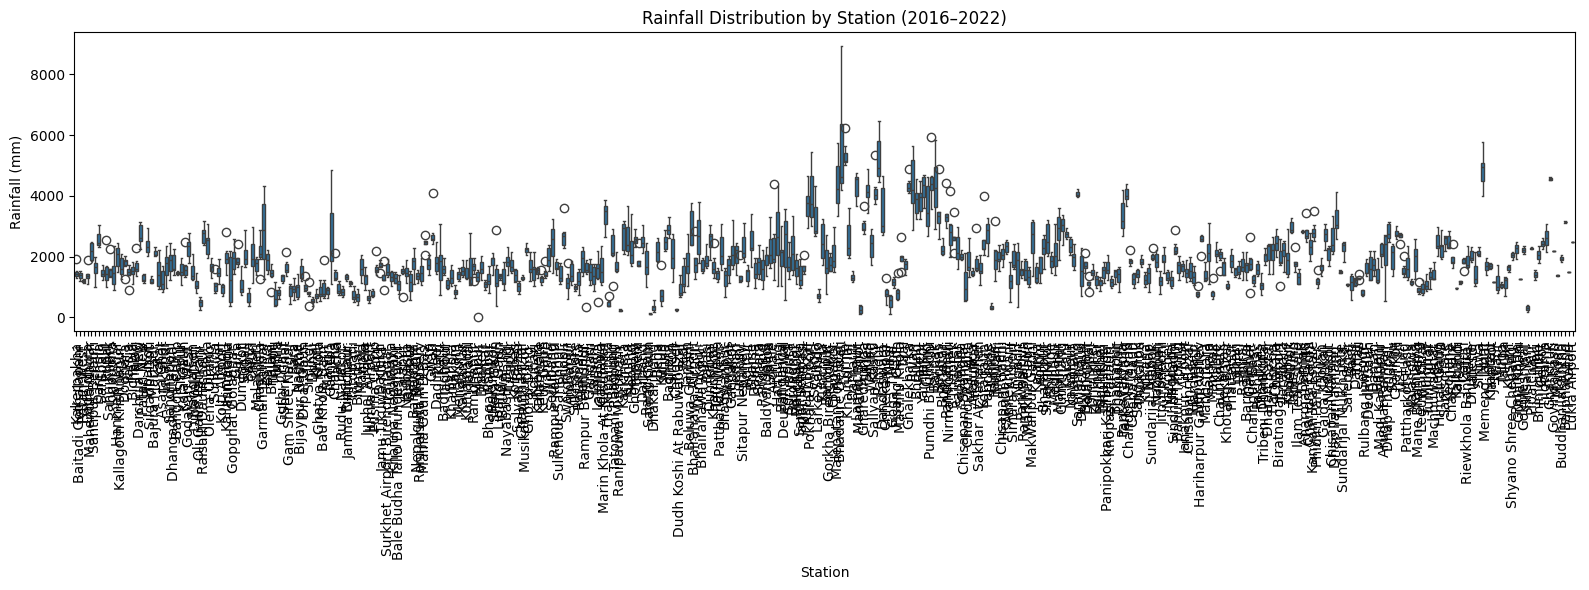

In [ ]:
# Rainfall distribution by station
plt.figure(figsize=(16,6))
sns.boxplot(data=df_long, x='Station', y='Rainfall')
plt.xticks(rotation=90)
plt.title('Rainfall Distribution by Station (2016–2022)')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

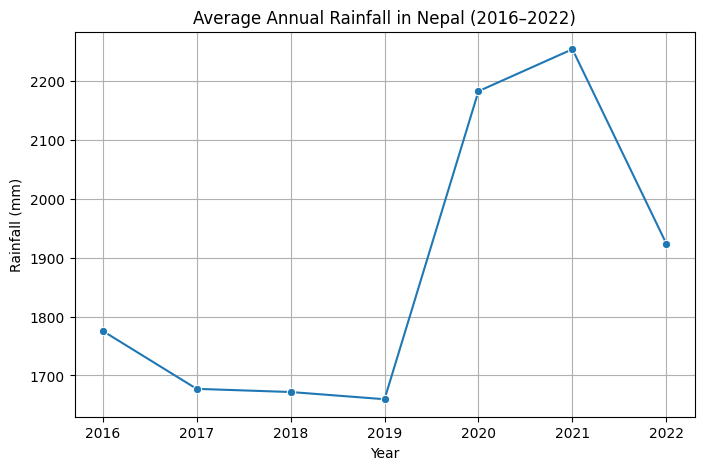

In [ ]:
# Average annual rainfall per year
avg_yearly = df_long.groupby('Year')['Rainfall'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=avg_yearly, x='Year', y='Rainfall', marker='o')
plt.title('Average Annual Rainfall in Nepal (2016–2022)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

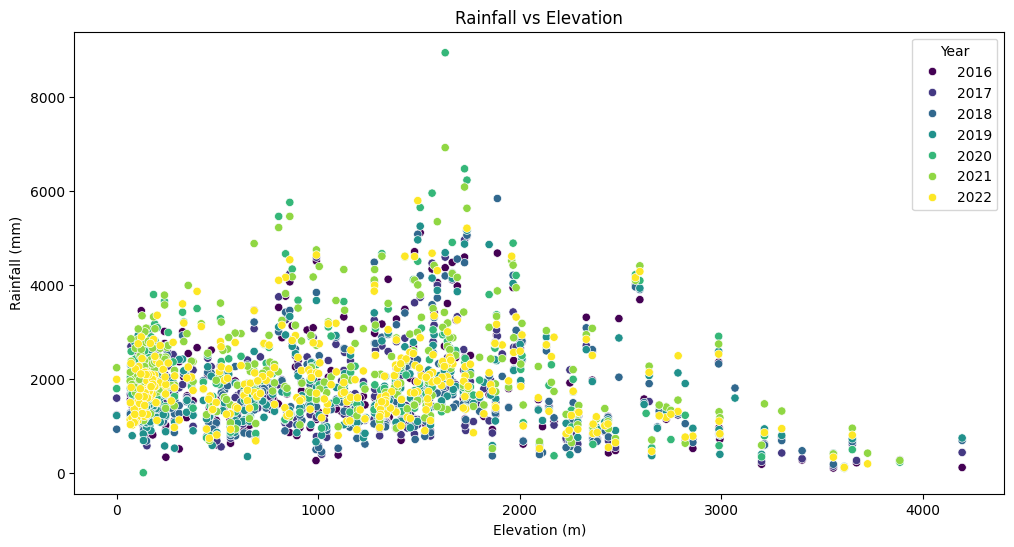

In [ ]:
# Rainfall vs Elevation
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_long, x='Elevation', y='Rainfall', hue='Year', palette='viridis')
plt.title('Rainfall vs Elevation')
plt.xlabel('Elevation (m)')
plt.ylabel('Rainfall (mm)')
plt.show()

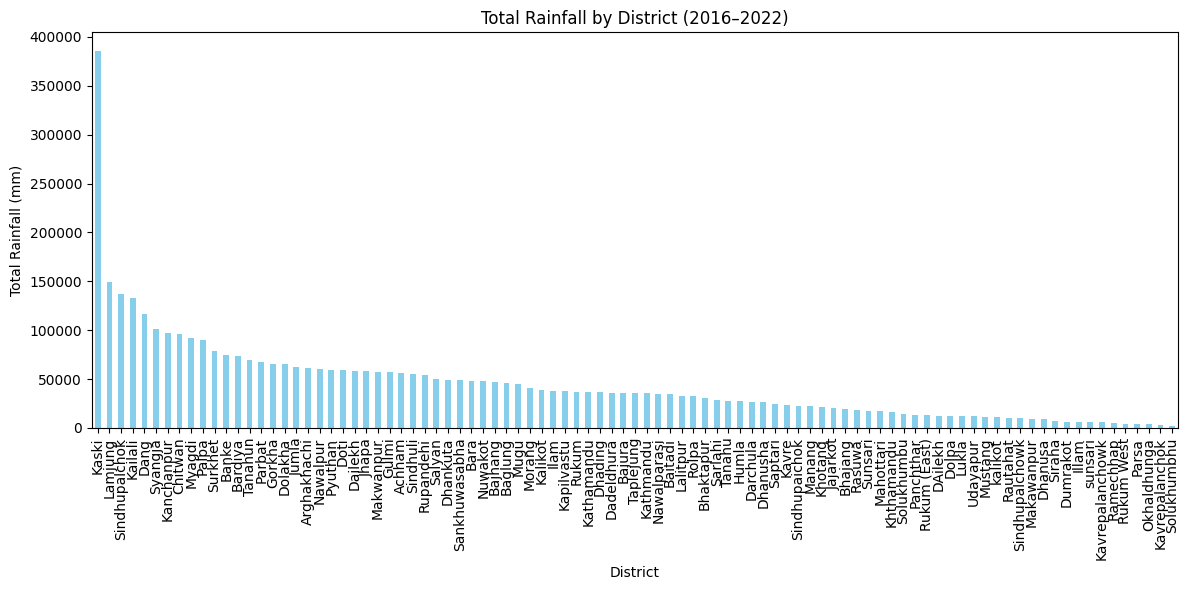

In [ ]:
# Total rainfall by district
total_rainfall = df_long.groupby('District')['Rainfall'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
total_rainfall.plot(kind='bar', color='skyblue')
plt.title('Total Rainfall by District (2016–2022)')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Results & Interpretation
- There is considerable variation in rainfall across stations and years.
- Some districts consistently receive higher rainfall.
- Elevation shows some relationship with rainfall, though it’s not strictly linear.
- Yearly average rainfall shows minor fluctuations from 2016 to 2022.

## Conclusion & Future Work
- The study highlights spatial and temporal patterns in rainfall across Nepal.
- Useful for regional planning in agriculture, water resources, and disaster preparedness.
- Future work can include geospatial mapping with coordinates, seasonal/monthly data analysis, and integrating other environmental factors.

## References / Data Sources
- Dataset: [National Statistics Office](https://data.nsonepal.gov.np/dataset/environmental-statistics/resource/9d953003-e045-4ee3-ad4b-bb2dac3336f0)
- Python Libraries: pandas, seaborn, matplotlib